<a href="https://colab.research.google.com/github/ArsT1982/DSML-59-DZ-1/blob/main/DSML_59_DZ_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ДЗ-1.Классификация. Логистическая регрессия и SVM

Классификация по уровню дохода. Логистическая регрессия

In [82]:
import pandas as pd
import numpy as np
import scipy.stats # При работе со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов

In [83]:
# Загружаем данные
df = pd.read_csv("adult.csv",na_values='?')
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,NaN,227026,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [85]:
### a) Проверка и удаление пропусков
print("Количество пропущенных значений по столбцам:")
print(df.isnull().sum())

Количество пропущенных значений по столбцам:
age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64


In [86]:
df['workclass'].unique() # ???? ---> NaN

array(['Private', 'Local-gov', nan, 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [87]:
df['occupation'].unique() # ???? ---> NaN

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', nan,
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

In [88]:
df['native-country'].unique() # ???? ---> NaN

array(['United-States', nan, 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

In [89]:
df['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Divorced',
       'Separated', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [94]:
df['education'].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', '5th-6th',
       'Assoc-voc', '9th', 'Doctorate', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [95]:
# удаляем ячейки с отсутствием данных
df = df[~(df['occupation'].isna())]
df = df[~(df['native-country'].isna())]
df = df[~(df['workclass'].isna())]

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   education        45222 non-null  object
 4   educational-num  45222 non-null  int64 
 5   marital-status   45222 non-null  object
 6   occupation       45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  object
 10  capital-gain     45222 non-null  int64 
 11  capital-loss     45222 non-null  int64 
 12  hours-per-week   45222 non-null  int64 
 13  native-country   45222 non-null  object
 14  income           45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


<ipython-input-97-157bb9b956a3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='income', data=df, palette='pastel')


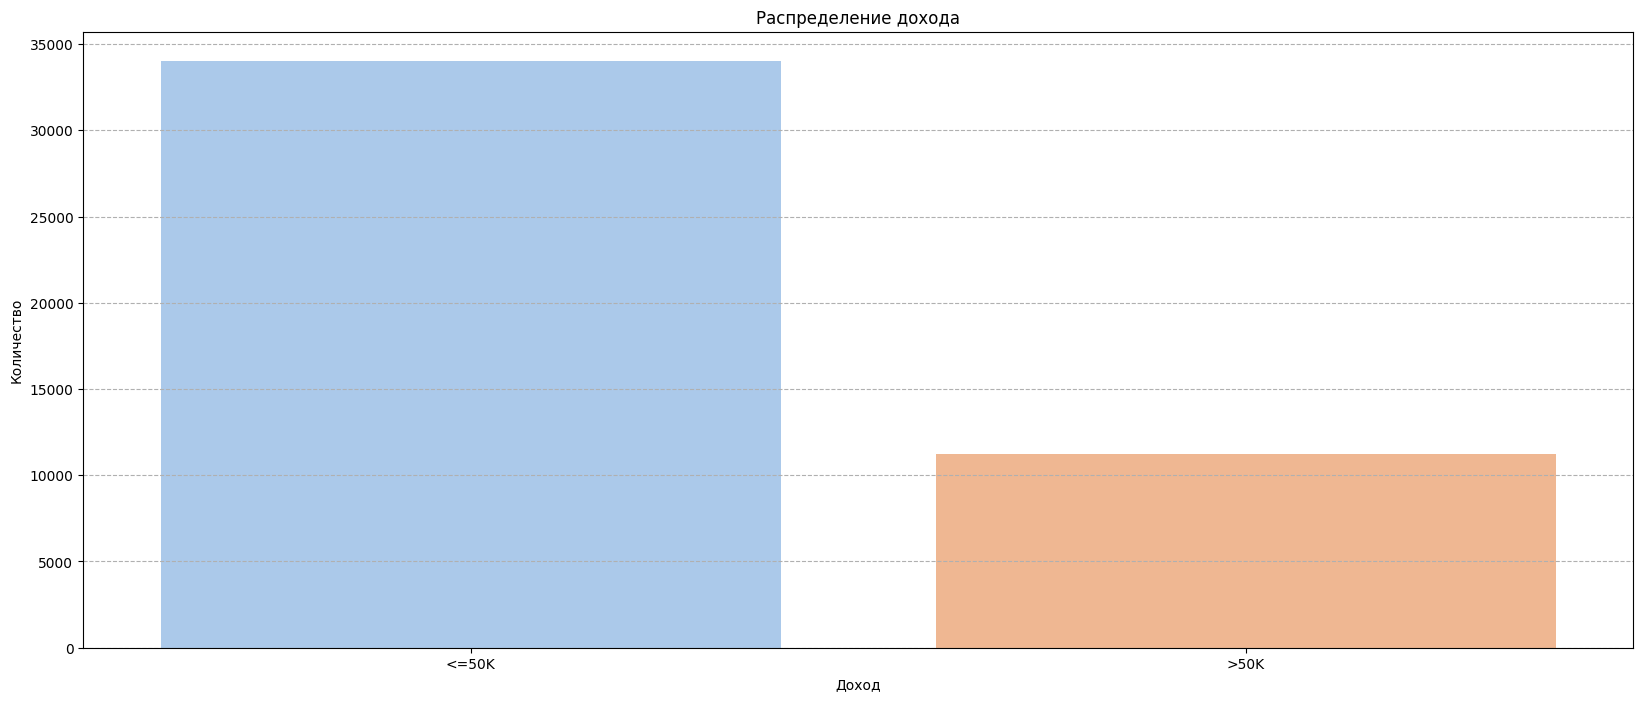

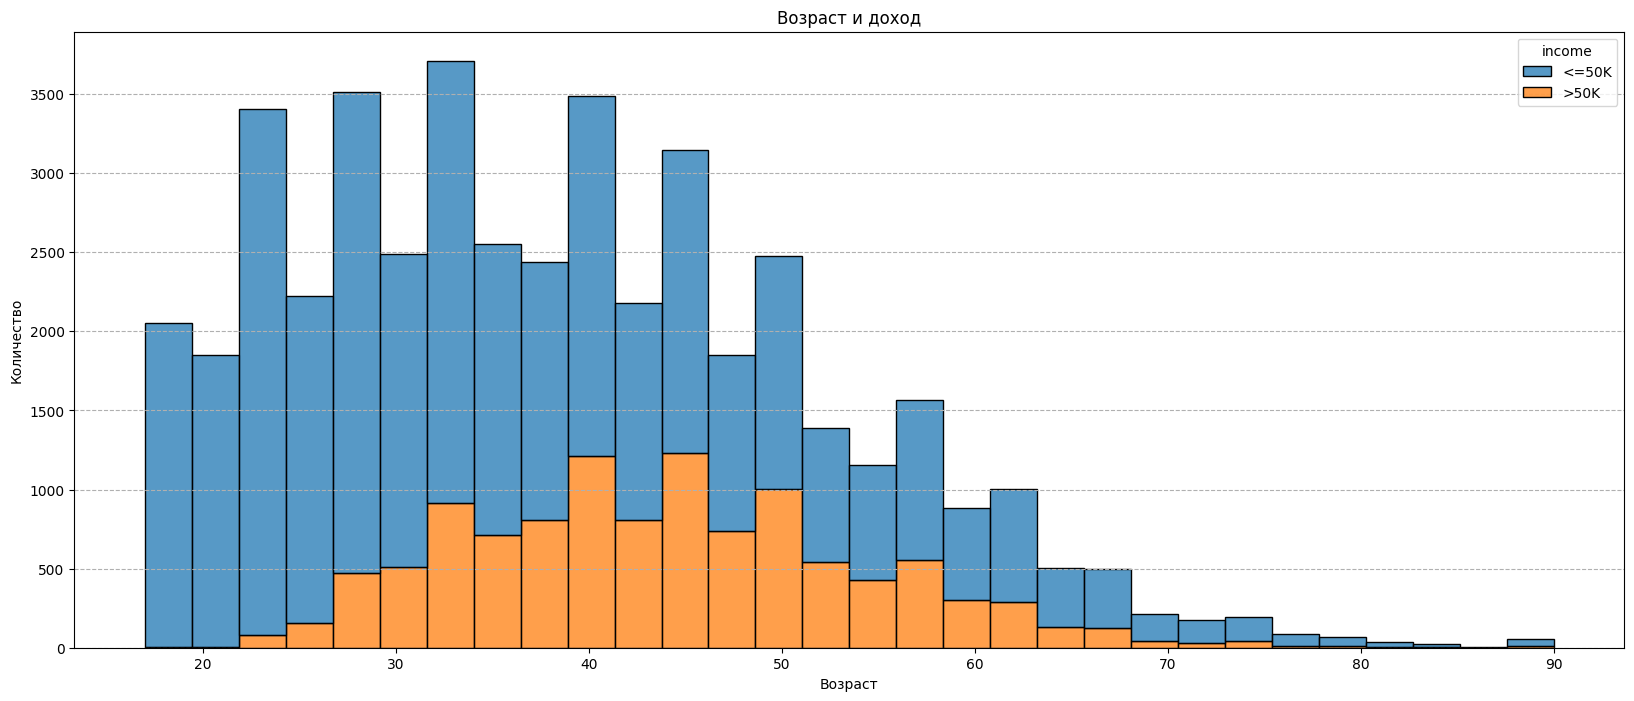

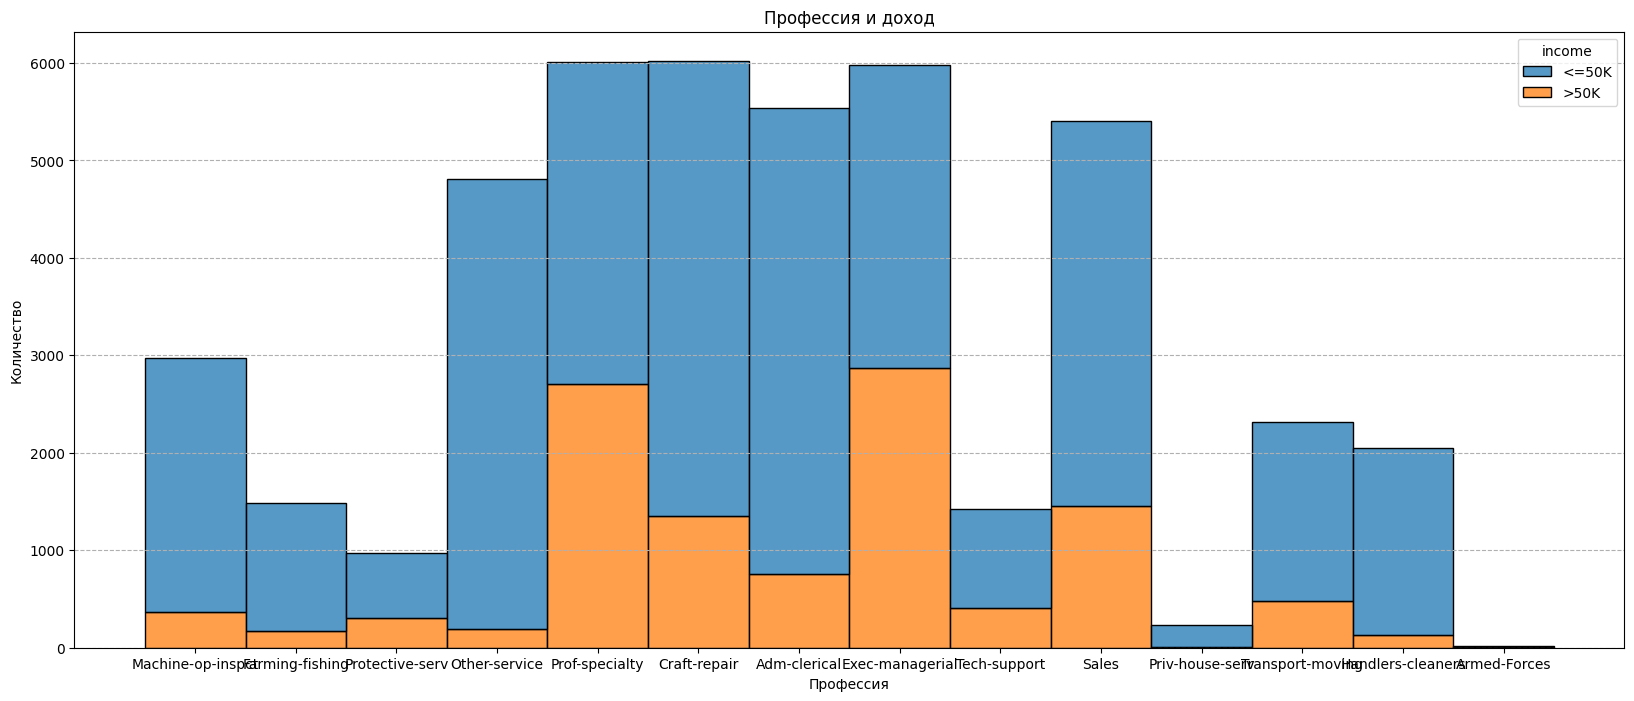

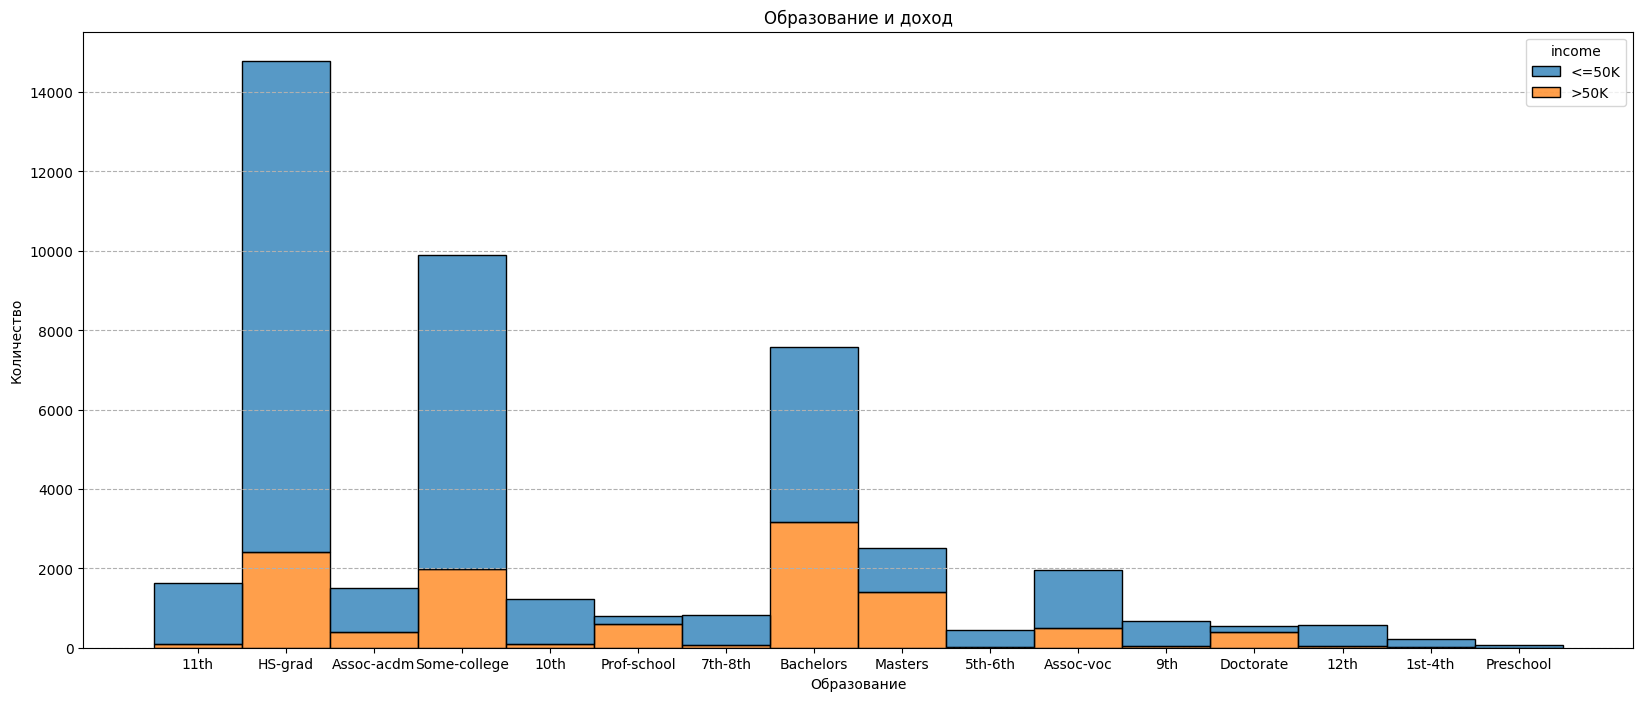

In [97]:
import matplotlib.pyplot as plt

# Графики
plt.figure(figsize=(20,8))
sns.countplot(x='income', data=df, palette='pastel')
plt.title("Распределение дохода")
plt.xlabel("Доход")
plt.ylabel("Количество")
plt.grid(axis='y', linestyle='--')
plt.show()

plt.figure(figsize=(20,8))
sns.histplot(data=df, x='age', hue='income', multiple='stack', bins=30)
plt.title("Возраст и доход")
plt.xlabel("Возраст")
plt.ylabel("Количество")
plt.grid(axis='y', linestyle='--')
plt.show()

plt.figure(figsize=(20,8))
sns.histplot(data=df, x='occupation', hue='income', multiple='stack', bins=30)
plt.title("Профессия и доход")
plt.xlabel("Профессия")
plt.ylabel("Количество")
plt.grid(axis='y', linestyle='--')
plt.show()

plt.figure(figsize=(20,8))
sns.histplot(data=df, x='education', hue='income', multiple='stack', bins=30)
plt.title("Образование и доход")
plt.xlabel("Образование")
plt.ylabel("Количество")
plt.grid(axis='y', linestyle='--')
plt.show()

# Аттрибут "educaion" выбран для читабельности на графике, в то время как для работы с датасетом я выбрал "educational-num"



In [98]:
from sklearn.linear_model import LogisticRegression



In [99]:
# попробуем выбрать какие-нибудь признаки, для начала
selectedColumns = df[['age', 'educational-num','occupation', 'income']]
selectedColumns.head()

,age,educational-num,occupation,income
0,25,7,Machine-op-inspct,<=50K
1,38,9,Farming-fishing,<=50K
2,28,12,Protective-serv,>50K
3,44,10,Machine-op-inspct,>50K
5,34,6,Other-service,<=50K


In [100]:
selectedColumns['occupation'].value_counts()

,count
occupation,
Craft-repair,6020
Prof-specialty,6008
Exec-managerial,5984
Adm-clerical,5540
Sales,5408
Other-service,4808
Machine-op-inspct,2970
Transport-moving,2316
Handlers-cleaners,2046


In [101]:
# столбец occupation - категориальная переменная
# переведем ее в значения 0 и 1, добавив столбцы с соответствующими названиями
X = pd.get_dummies(selectedColumns, columns=['occupation'], dtype = 'int', drop_first=True)

# столбец income является целевой переменной, удаляем его из Х
del X['income']

X.head()

,age,educational-num,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,25,7,0,0,0,0,0,1,0,0,0,0,0,0,0
1,38,9,0,0,0,1,0,0,0,0,0,0,0,0,0
2,28,12,0,0,0,0,0,0,0,0,0,1,0,0,0
3,44,10,0,0,0,0,0,1,0,0,0,0,0,0,0
5,34,6,0,0,0,0,0,0,1,0,0,0,0,0,0


In [102]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['income'])

LabelEncoder()

In [103]:
le.classes_

array(['<=50K', '>50K'], dtype=object)

In [104]:
# записываем в таргетную переменную y преобразованный столбец income

y = pd.Series(data=le.transform(df['income']))
y.head()

,0
0,0
1,0
2,1
3,1
4,0


In [105]:
from sklearn.pipeline import make_pipeline  # используем пайплайны для удобства
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [107]:
# обучаем на части датасета (train)

model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [108]:
predictions[30:40] # посмотрим как выглядят наши предсказания

array([1, 0, 0, 1, 0, 0, 0, 1, 1, 1])

In [109]:
model.predict_proba(X_test)[30:40]

array([[0.43920843, 0.56079157],
       [0.92809613, 0.07190387],
       [0.83728578, 0.16271422],
       [0.42805149, 0.57194851],
       [0.52896462, 0.47103538],
       [0.70485727, 0.29514273],
       [0.95996325, 0.04003675],
       [0.35727106, 0.64272894],
       [0.30509542, 0.69490458],
       [0.2814214 , 0.7185786 ]])

In [110]:
model.score(X_train, y_train)

0.7861624789230727

In [111]:
acc_logreg = model.score(X_test,y_test)
print(f"Точность логистической регрессии: {acc_logreg:.4f}")

Точность логистической регрессии: 0.7865


Классификация по уровню дохода. Метод опорных векторов. SVM

In [112]:
from sklearn.svm import SVC

# используем пайплайны
clf = make_pipeline(StandardScaler(), SVC())
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [113]:
clf.score(X_train, y_train)

0.7929900212842413

In [114]:
acc_svm = clf.score(X_test, y_test)
print(f"Точность SVM: {acc_svm:.4f}")

Точность SVM: 0.7946


**Итоги:**

1) Были удалены пропущенные (обозначенные "?" и преобразованные в NaN) значения.

2) Выведены (увеличенные для наглядности) графики для анализа датасета и выбора стратегии создания модели - "какие атрибуты коррелируют с целевыми?". Были выбраны: возраст, образование и категория профессии.

3) Далее был закодриован категориальный признак профессии  (0 и 1)

4) Аналогичко закодирована целевая категория "income" (заработок).

**Выводы:**

1) Модель логистической регрессии показала точность: 0.7865

2) Модель SVM показала точность: 0.7946

Т.е. метод опорных векторов показал небольшое улучшение в сравнении с логистической регрессией (но и по времени SVM-модель обучалась более длительное время).

Не смотря на это, считаю что обе модели справились с задачей умеренно хорошо.

Возможное улучшение могло бы быть достигнуто введением бОльшего количества учитывемых моделью аттрибутов и, пожалуй, использованием one-hot encoding.
